In [1]:
#Black & Scholes modelling

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# N() = cumulative distribution function
# T = time left til' maturity (in years)
# S = stock price
# K = strike price
# r = risk free rate
# sigma = volatility


N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K)+ (r+sigma**2/2)*T)/sigma*np.sqrt(T) #Modelling
    d2 = d1 - sigma*np.sqrt(T)
    return S*N(d1)-K*np.exp(-r*T) * N(d2) #Write it manually

In [2]:
def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K)+ (r+sigma**2/2)*T)/sigma*np.sqrt(T)
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T) * N(-d2) - S * N(-d1)

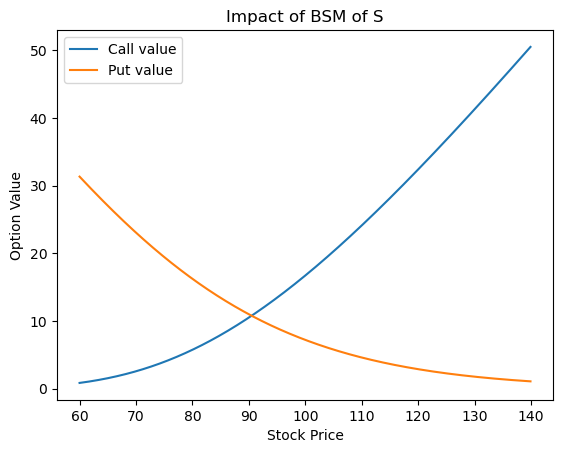

In [3]:
K = 100
r = 0.1
T = 1
sigma = 0.3

S = np.arange(60,140,0.1) # Array range

calls = [BS_CALL(s, K , T , r , sigma) for s in S] # Array of series of option value
puts = [BS_PUT(s, K , T , r , sigma) for s in S]

plt.plot(S,calls, label = 'Call value')
plt.plot(S,puts, label = 'Put value')
plt.xlabel('Stock Price')
plt.ylabel('Option Value')
plt.title('Impact of BSM of S')
plt.legend()

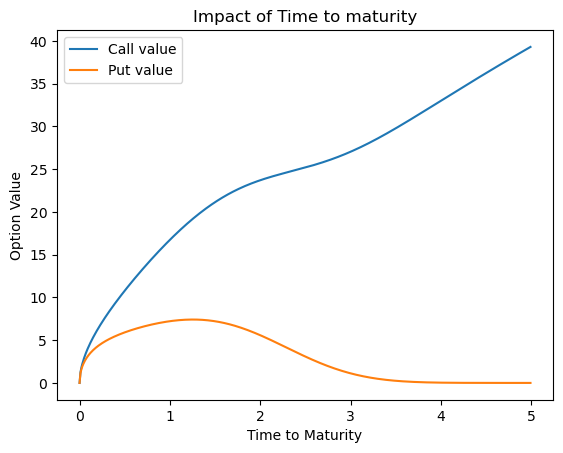

In [4]:
# Time to maturity become a variable

K = 100
r = 0.1
S = 100
sigma = 0.3

T = np.arange(0,5,0.01) #Array range # increment of 1%

calls = [BS_CALL(S, K , t , r , sigma) for t in T] # Array of series of option value
puts = [BS_PUT(S, K , t , r , sigma) for t in T]

plt.plot(T,calls, label = 'Call value')
plt.plot(T,puts, label = 'Put value')
plt.xlabel('Time to Maturity')
plt.ylabel('Option Value')
plt.title('Impact of Time to maturity')
plt.legend()

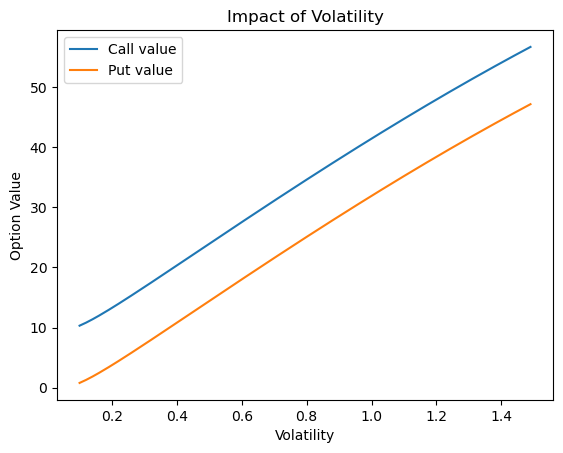

In [5]:
# Sigma(volatility) become a variable

K = 100
r = 0.1
S = 100
T = 1

Sig = np.arange(0.1,1.5,0.01) #Array range # increment of 1%

calls = [BS_CALL(S, K , T , r , sig) for sig in Sig] # Array of series of option value
puts = [BS_PUT(S, K , T , r , sig) for sig in Sig]

plt.plot(Sig,calls, label = 'Call value')
plt.plot(Sig,puts, label = 'Put value')
plt.xlabel('Volatility')
plt.ylabel('Option Value')
plt.title('Impact of Volatility')
plt.legend()

In [6]:
#Black & Scholes modelling with dividend

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

N = norm.cdf

def BS_CALL_D(S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + ((r-q) + sigma**2/2)*T) / sigma * np.sqrt(T) #Modelling
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q*T) * N(d1) - K * np.exp(-r*T) * N(d2) #Write it manually

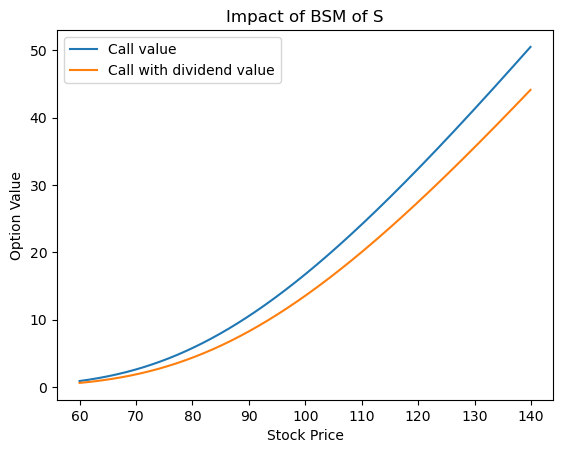

In [7]:
K = 100
r = 0.1
q = 0.05 #Annualised dividend - Stock price is expected to drop as compared to another stock without dividend
T = 1
sigma = 0.3

S = np.arange(60,140,0.1) #Array range

calls = [BS_CALL(s, K , T , r , sigma) for s in S] # Array of series of option value
calls_D = [BS_CALL_D(s, K , T , r , q , sigma) for s in S]

plt.plot(S,calls, label = 'Call value')
plt.plot(S,calls_D, label = 'Call with dividend value')
plt.xlabel('Stock Price')
plt.ylabel('Option Value')
plt.title('Impact of BSM of S')
plt.legend()